# Guided Project: Finding the Best Markets to Advertise In

## Introduction

In this project, let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first. We can try to search existing data that might be relevant for our purpose.

### Summary

In this project, we analyzed the outcome of a survey on new coders to decide which market we should invest in.

The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.

## The Data

One good candidate is the data from [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/take-the-2017-new-coder-survey-and-help-us-build-a-massive-public-dataset-8c808cbee7eb/). [freeCodeCamp](https://www.freecodecamp.org) is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

## Librairies Import

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Initial Data Exploration

In [101]:
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)
survey.shape

(18175, 136)

In [102]:
pd.options.display.max_columns = 150 # to avoid truncated output 
survey.head(3)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

Most column names are self-explanatory, but it seems that we don't have a clear documentation explaining each column name. However, you can find more information in the raw-data folder of the [repository](https://github.com/freeCodeCamp/2017-new-coder-survey) we mentioned above — you can find the initial survey questions, and from there it should be easy to infer what each column describes.

## Data Analysis

As we mentioned earlier, most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:
* Where are these new coders located
* What are the locations with the greatest number of new coders
* How much money new coders are willing to spend on learning

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

### Is our sample representative?

For our sample to be representative of our population of interest, we need to ensure it features people who are interested in the subjects we teach.

Let's have a look at the distribution of the respondents job roles interests.

In [103]:
survey["JobRoleInterest"].value_counts(normalize=True, sort=True, ascending=False)*100

Full-Stack Web Developer                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                

From the frequency distribution table above, we can observe that:
* A lot of people are interested in web development
* Only a few people are interested in mobile development
* Some people are interested in more than one subject/job role

In the next block of code, we determine how many people are interested in a single subject and how many have mixed interests. 

In [104]:
interests_not_null = survey["JobRoleInterest"].dropna()

survey["InterestsCount"] = interests_not_null.str.split(',').apply(lambda x: len(x))

In [105]:
survey["InterestsCount"].value_counts(normalize=True)*100

1.0     31.650458
3.0     15.889588
4.0     15.217391
5.0     12.042334
2.0     10.883867
6.0      6.721968
7.0      3.861556
8.0      1.759153
9.0      0.986842
10.0     0.471968
12.0     0.300343
11.0     0.185927
13.0     0.028604
Name: InterestsCount, dtype: float64

Close to one third of the respondents in our sample are interested in a single type of job role.

The vast majority of them, on the other hand have expressed mixed interests. These people may not be sure of what they want to do yet or they may want to have a broader view on the technologies.

As we offer courses on different domains, it is good for us to have leaners with multiple fields of interest.

However, most of the courses we offer are still on Web and Mobile Development. We thus want to make sure that respondents in our sample are in a vast majority interested in at least one of these to topics.

True     86.298627
False    13.701373
Name: JobRoleInterest, dtype: float64


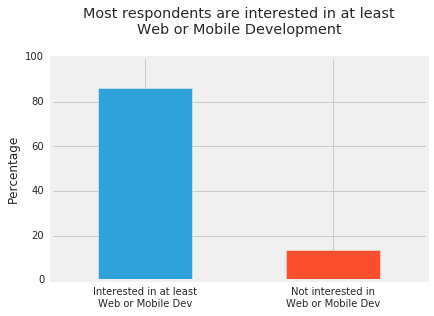

In [106]:
# Frequency distribution table
web_or_mobile = survey["JobRoleInterest"].str.contains("Web|Mobile")
freq_table = web_or_mobile.value_counts(normalize=True)*100
print(freq_table)

# Graphical representation of the frequency distribution
freq_table.plot.bar()

plt.xticks([0,1],['Interested in at least\nWeb or Mobile Dev','Not interested in\nWeb or Mobile Dev'],rotation=0)
plt.ylabel('Percentage')
plt.ylim([0,100])
plt.title('Most respondents are interested in at least\nWeb or Mobile Development', y=1.08)
plt.show()

From the graph above, we can conclude that this sample is representative of our population/target audience.
Indeed, that vast majority (86.3%) of the respondents of this survey are interested in at least Web or Mobile Development.

Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it. We can start with finding out where these new coders are located, and what are the densities (how many coders there are) for each location.

## Where are the new coders located?

The data set provides information about the location of each participant at a country level. The `CountryCitizen` variable describes the country of origin for each participant, and the `CountryLive` variable describes what country each participants lives in (which may be different than the origin country).

For our analysis, we'll work with the `CountryLive` variable because we're interested where people actually live at the moment when we run the ads. In other words, we're interested where people are located, not where they were born.

Because the data set provides information at a country level, we can think of each country as an individual market. This means we can frame our goal as finding the two best countries to advertise in.

One indicator of a good market is the number of potential customers — the more potential customers in a market, the better. If our ads manage to convince 10% of the 5000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B.

To make sure we continue working with a representative sample, we drop all the rows where participants didn't answer what role they are interested in. Where a participant didn't respond, we can't know for sure what their interests are, so it's better if we leave out this category of participants.

In [107]:
print('Number of respondents: ',len(survey))
number_nulls = survey["JobRoleInterest"].isnull().sum()
print('Number of respondents who did not specify an interest for a job role: ',number_nulls)
survey_good = survey.dropna(subset=["JobRoleInterest"]).copy()
print('Number of respondents left after filtering: ',len(survey_good))

Number of respondents:  18175
Number of respondents who did not specify an interest for a job role:  11183
Number of respondents left after filtering:  6992


We then can generate a frequency table for the `CountryLive` variable.

In [108]:
absolute_freq = survey_good["CountryLive"].value_counts()
relative_freq = survey_good["CountryLive"].value_counts(normalize=True)*100

frequencies = pd.DataFrame()
frequencies["Absolute Frequency"] = absolute_freq
frequencies["Relative Frequency"] = relative_freq

frequencies

,Absolute Frequency,Relative Frequency
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


From the frequency distribution data above, we can make the following observations:
* Short of 50% of the respondents come from the USA
* Second most promising market is India with close to 8% of new coders living in this country
* Other countries like the UK and Canada are not that far from India in terms of share of new coders

Based on this analysis, we could decide to invest in the US and Indian markets as they seem to be the most promising. However, our analysis doesn't take into account the total amount of money spent per new coder in each of those countries. In fact, investing in a country where people are only willing to learn for free is unlikely to be profitable for us.

In the next section, we figure out how much money new coders are actually willing to spend on learning.

### How much money are new coders willing to spend on learning?

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

* These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.


* Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

In the next block of code, we create a new column that descibes the amount of money a student has spend per month (at the moment they completed the survey).

In [109]:
survey_good["MonthsProgramming"].unique()

array([  6.,   5.,  24.,  12.,  18.,   1.,  nan,   9.,  14.,  28.,   3.,
         2.,  25.,   8.,  32.,  60.,  19.,  36.,  30.,  48.,  10.,  15.,
        40.,  20.,   4.,   0.,  16.,  26.,  13.,  11.,  29.,  72.,  50.,
         7.,  17.,  54.,  84., 240.,  42.,  34.,  55.,  59.,  51., 200.,
        70.,  44.,  49., 105.,  80.,  45., 744.,  21.,  96.,  46.,  31.,
        22., 108.,  23.,  39., 120.,  43.,  35.,  33.,  52.,  75.,  41.,
        27., 180., 100., 360., 113., 124., 370.,  86., 144.,  73.,  83.,
       190.,  56.,  38.,  37.,  69., 156., 171., 198., 264.,  58., 480.,
       111., 408., 300.,  89.])

There is a wide variety of unique values in the `MonthsProgramming` column as respondents are more or less advanced in their learning track.
Moreover, some students answered that they had been learning to code for 0 months (it might be that they had just started when they completed the survey).

In [110]:
# Replacing 0s with 1s to avoid dividing by 0 later
survey_good["MonthsProgramming"].replace(0,1,inplace=True)

survey_good["MoneyPerMonth"] = survey_good["MoneyForLearning"] / survey_good["MonthsProgramming"]
survey_good["MoneyPerMonth"].isnull().sum()

675

675 rows feature a null value in the new `MoneyPerMonth` column. We decide to get rid of them.

In [111]:
survey_good.dropna(subset=["MoneyPerMonth"],inplace=True)

We want to group the data by the `CountryLive` column and find how much money a student spends on average each month in the US, India, the United Kingdom and Canada.

We start by removing as well any rows that have null values in the `CountryLive` column.

In [112]:
survey_good.dropna(subset=["CountryLive"],inplace=True)

We can then calculate the frequency distribution table of the remaining data, to ensure we have enough to continue our analysis.

In [113]:
survey_good["CountryLive"].value_counts().head(4)

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: CountryLive, dtype: int64

This should be enough. So let's now compute the mean of the money spent by respondents per countries.

In [114]:
countries_mean = survey_good.groupby(by="CountryLive").mean()

countries_mean["MoneyPerMonth"][["United States of America","India","United Kingdom","Canada"]]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

We can see that learners in the USA are the ones that spend the most per month on learning, at least in our group of four pre-selected countries.
Suprisingly, India has a much higher statistic that the United Kingdom, and slightly higher than the Canada.

Comparing the GDP per capita of India to those of the United Kingdom and Canada, we would expect people in the UK and in Canada to have significantly more financial resources to allocate to online learning. So even with slightly fewer learners, we would have expected the average money spent monthly for the UK and Canada to be around the one of India or higher.

It may be that our data are not representative enough for some of those countries or that we have outliers due to wrong answers in the survey. That could lead to an overestimate of this statistic for India or an underestimate for the UK or Canada.
Or it may be that the results are correct.

Let's dig deeper on that matter in the next part.

#### Checking for outliers

In this sub-section, we investigate further the distribution of the monthly spent money per respondent to check for any outliers.

Let's use boxplots to visualize the distribution of the money spent monthly by all respondents per country.

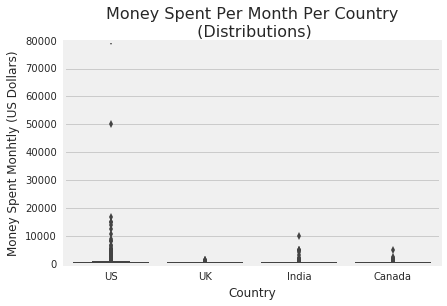

In [115]:
survey_4_countries = survey_good[survey_good["CountryLive"].str.contains('United States of America|India|United Kingdom|Canada')]

sns.boxplot(y="MoneyPerMonth",x="CountryLive",data=survey_4_countries)
plt.title('Money Spent Per Month Per Country\n (Distributions)', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Money Spent Monhtly (US Dollars)')
plt.xticks(range(0,4),['US','UK','India','Canada'])
plt.show()

We can directly see two very distinct outliers for the US. One respondent respondent seems to have spent 80k\$ per month on average for learning while another would have spent 50k\$.
This not impossible but it seems very unlikely regarding the average prices of online courses.
Below 20k\$, we observe a cluster of point, indicating that this would be the top limit for realistic values.

With such outliers for the US, the dynamic of the plot is messed up and it is hard to make any conclusions for the other three countries.

Let's get rid of these two outliers and re-create the plot.

In [116]:
survey_good = survey_good[survey_good["MoneyPerMonth"] < 20000]

We let's recompute the mean values and the boxplot again.

In [117]:
countries_mean = survey_good.groupby(by="CountryLive").mean()

countries_mean["MoneyPerMonth"][["United States of America","India","United Kingdom","Canada"]]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64

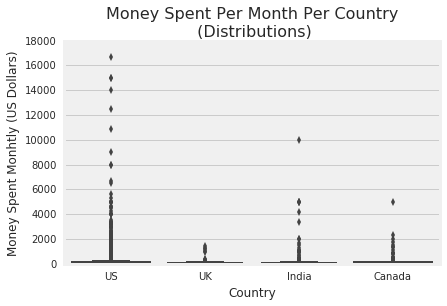

In [118]:
survey_4_countries = survey_good[survey_good["CountryLive"].str.contains('United States of America|India|United Kingdom|Canada')]

sns.boxplot(y="MoneyPerMonth",x="CountryLive",data=survey_4_countries)
plt.title('Money Spent Per Month Per Country\n (Distributions)', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Money Spent Monhtly (US Dollars)')
plt.xticks(range(0,4),['US','UK','India','Canada'])
plt.show()

We can now better analyze the distribution of values for the other markets.

We can see a few outliers for India and one for Canada. However it is not easy to determine if these are good data points are not.
In fact, a few people may have attended bootcamps, which tend to be more expensive than online subscriptions.

Let's isolate these few points and examine them.

In [119]:
india_mask = survey_4_countries["CountryLive"] == "India"
spent_mask = survey_4_countries["MoneyPerMonth"] > 2500

india_outliers = survey_4_countries[india_mask & spent_mask]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,InterestsCount,MoneyPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,N

It seems that neither participant attended a bootcamp. Overall, it's really hard to figure out from the data whether these persons really spent that much money with learning. The actual question of the survey was "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?", so they might have misunderstood and thought university tuition is included. It seems safer to remove these rows.

In [120]:
print("Number of rows before india outliers drop: ", len(survey_4_countries))
survey_4_countries.drop(india_outliers.index, inplace=True)
print("Number of rows after india outliers drop: ", len(survey_4_countries))

Number of rows before india outliers drop:  3913
Number of rows after india outliers drop:  3907


The 6 outliers have been correctly dropped.

Looking at the boxplot above, we are still left with a bunch of outliers (data points above \$6000) for the US and one outlier for Canada. Let's examine those.

In [121]:
us_mask = survey_4_countries["CountryLive"] == "United States of America"
spent_mask = survey_4_countries["MoneyPerMonth"] > 6000

us_outliers = survey_4_countries[us_mask & spent_mask]
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,InterestsCount,MoneyPerMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


Out of these 11 extreme outliers, six people attended bootcamps, which justify the large sums of money spent on learning. For the other five, it's hard to figure out from the data where they could have spent that much money on learning. Consequently, we'll remove those rows where participants reported thay they spend \$6000 each month, but they have never attended a bootcamp.


Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). As a consequence, we'll remove these eight outliers.


In the next code block, we'll remove respondents that:
* Didn't attend bootcamps.


* Had been programming for three months or less when at the time they completed the survey.

In [122]:
# Remove the respondents from the US who didn't attend a bootcamp
no_bootcamp = survey_4_countries[
  (survey_4_countries["CountryLive"] == "United States of America")
    &
  (survey_4_countries["AttendedBootcamp"] == 0)
    &
  (survey_4_countries["MoneyPerMonth"] > 6000)
]

survey_4_countries.drop(no_bootcamp.index, inplace=True)

# Remove the respondents from the US who have been programming for 3 months or less
beginners = survey_4_countries[
  (survey_4_countries["CountryLive"] == "United States of America")
    &
  (survey_4_countries["MonthsProgramming"] <= 3)
    &
  (survey_4_countries["MoneyPerMonth"] > 6000)
]

survey_4_countries.drop(beginners.index, inplace=True)

Now were done with outliers from India and the US, we are left with just one outlier from Canada. Let's examine it.

In [123]:
canada_mask = survey_4_countries["CountryLive"] == "Canada"
spent_mask = survey_4_countries["MoneyPerMonth"] > 4000

canada_outliers = survey_4_countries[canada_mask & spent_mask]
canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,InterestsCount,MoneyPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,8.0,5000.0


This respondent seems to be similar to the outliers we observed for the US.

In fact, he has enrolled in a Bootcamp but had only been programming for 2 months at the time of the survey. This means that he paid a high amount for his bootcamp but will likely not pay anything else for the following months.

Thus, we decide to take the same approach as previously and remove this data point.

In [124]:
survey_4_countries.drop(canada_outliers.index, inplace=True)

Now we got rid of all the outliers, let's recompute the average monthly spent money per country and update the boxplot.

In [125]:
countries_mean = survey_4_countries.groupby(by="CountryLive").mean()

countries_mean["MoneyPerMonth"]

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: MoneyPerMonth, dtype: float64

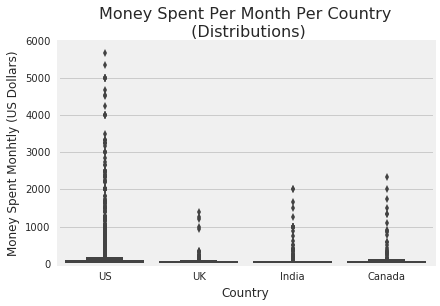

In [126]:
sns.boxplot(y="MoneyPerMonth",x="CountryLive",data=survey_4_countries)
plt.title('Money Spent Per Month Per Country\n (Distributions)', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Money Spent Monhtly (US Dollars)')
plt.xticks(range(0,4),['US','UK','India','Canada'])
plt.show()

After getting rid of the oultiers, we now see that Canada is before India in terms of average money spent monthly by new coders.

In the final section, we decide the markets in which to invest and motivate our decision.

### Choosing the two best markets to invest in

Considering the results we've found so far, one country we should definitely advertise in is the US. There are a lot of new coders living there and they are willing to pay a good amount of money each month (roughly \$143).

We also have to choose a second best market to advertise in. 
If we only look at the average money spent monthly by learners, Canada seems to be the most promising candidate. In fact, this statistic for the UK is less than half of that of Canada.

But before making our decision, let's have another look at India.
We sell our subscriptions at a price of \$59 per month, which is sligthly below the average money indian learners seem willing to spend monthly.
Moreover, we saw at the beginning of our analysis that India is the second biggest market in terms of number of learners. We have twice as many potential customers in Canada than we have in Canada.

Let's compute the distribution of respondents per country again.

In [127]:
survey_4_countries["CountryLive"].value_counts()

United States of America    2920
India                        457
United Kingdom               279
Canada                       239
Name: CountryLive, dtype: int64

So it's not crystal clear what to choose between Canada and India. Although it seems more tempting to choose Canada, there are good chances that India might actually be a better choice because of the large number of potential customers.

At this point, it seems that we have several options:


1. Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:
    * 60% for the US, 25% for India, 15% for Canada.
    * 50% for the US, 30% for India, 20% for Canada; etc.

2. Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:
    * 70% for the US, and 30% for India.
    * 65% for the US, and 35% for Canada; etc.

3. Advertise only in the US.

At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.

## Conclusion

In this project, we analyzed the outcome of a survey on new coders to decide which market we should invest in.

The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.